In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch

from func2graph import data, models, tools

torch.Size([10, 30000])


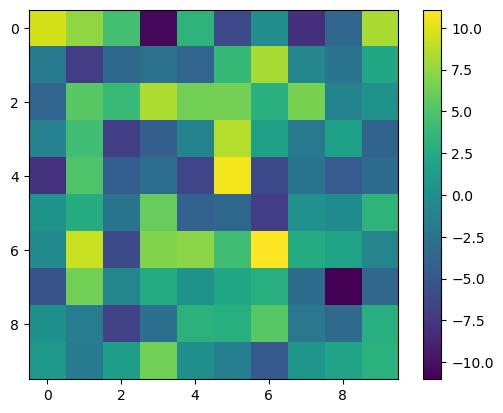

In [14]:
neuron_num = 10
dt = 0.001
tau = 0.3
total_time = 30000

weight_scale = 5
init_scale = 0.1

spike_neuron_num = 2
spike_input = 5

train_data_size = 20000
window_size = 200
random_seed = 42
batch_size = 32

trainloader, validloader, weight_matrix = data.generate_simulation_data(
    neuron_num=neuron_num,
    dt=dt,
    tau=tau,
    total_time=total_time,
    spike_neuron_num=spike_neuron_num,
    spike_input=spike_input,
    train_data_size=train_data_size,
    window_size=window_size,
    random_seed=random_seed,
    batch_size=batch_size,
    weight_scale=weight_scale,
    init_scale=init_scale,
)

plt.imshow(weight_matrix.detach().numpy())
plt.colorbar()
plt.show()

In [15]:
hidden_size_1=128
h_layers_1=2
heads=1
attention_layers=1
hidden_size_2=64
h_layers_2=2
learning_rate=1e-4

predict_mode_model = models.Attention_Autoencoder(
    neuron_num=neuron_num,
    window_size=window_size,
    hidden_size_1=hidden_size_1,
    h_layers_1=h_layers_1,
    heads=heads,
    attention_layers=attention_layers,
    hidden_size_2=hidden_size_2,
    h_layers_2=h_layers_2,
    learning_rate=learning_rate,
    prediction_mode=True,     ########################
)

In [16]:
checkpoint_path = "../../checkpoints/epoch=5-step=3750-v1.ckpt"
predictions, ground_truths, avg_attention, attentions = tools.get_avg_attention(trainloader, predict_mode_model, checkpoint_path, neuron_num)

print(predictions.shape)
print(ground_truths.shape)
print(avg_attention.shape)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA RTX A4000') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Missing logger folder: /homes/gws/wz86/func2graph/notebook/check_evaluation/lightning_logs
Restoring states from the checkpoint path at ../../checkpoints/epoch=5-step=3750-v1.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Loaded model weights from the checkpoint at ../../checkpoints/epoch=5-step=3750-v1.ckpt


Predicting DataLoader 0:   0%|          | 0/625 [00:00<?, ?it/s]1
2
3
Predicting DataLoader 0:   0%|          | 1/625 [00:00<00:03, 198.90it/s]1
2
3
Predicting DataLoader 0:   0%|          | 2/625 [00:00<00:02, 252.10it/s]1
2
3
Predicting DataLoader 0:   0%|          | 3/625 [00:00<00:02, 285.28it/s]1
2
3
Predicting DataLoader 0:   1%|          | 4/625 [00:00<00:02, 299.86it/s]1
2
3
Predicting DataLoader 0:   1%|          | 5/625 [00:00<00:01, 320.30it/s]1
2
3
Predicting DataLoader 0:   1%|          | 6/625 [00:00<00:01, 337.65it/s]1
2
3
Predicting DataLoader 0:   1%|          | 7/625 [00:00<00:01, 341.54it/s]1
2
3
Predicting DataLoader 0:   1%|▏         | 8/625 [00:00<00:01, 349.45it/s]1
2
3
Predicting DataLoader 0:   1%|▏         | 9/625 [00:00<00:01, 359.87it/s]1
2
3
Predicting DataLoader 0:   2%|▏         | 10/625 [00:00<00:01, 367.82it/s]1
2
3
Predicting DataLoader 0:   2%|▏         | 11/625 [00:00<00:01, 372.74it/s]1
2
3
Predicting DataLoader 0:   2%|▏         | 12/625 [00:00<00:

PREDICT Profiler Report

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                      	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                       	|  -              	|  8781           	|  2.8454         	

(20000, 10, 200)
(20000, 10, 200)
(10, 10)


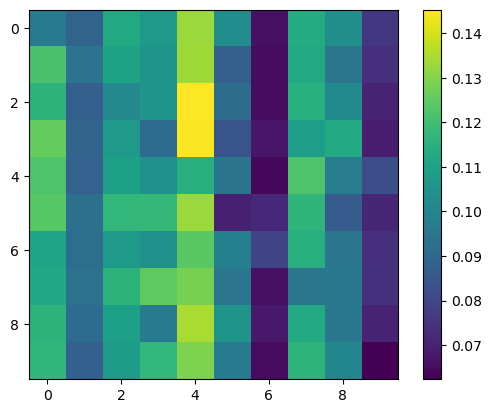

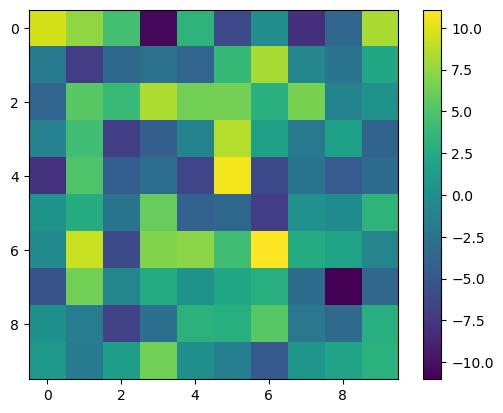

In [17]:
plt.imshow(avg_attention)
plt.colorbar()
plt.show()

plt.imshow(weight_matrix.detach().numpy())
plt.colorbar()
plt.show()

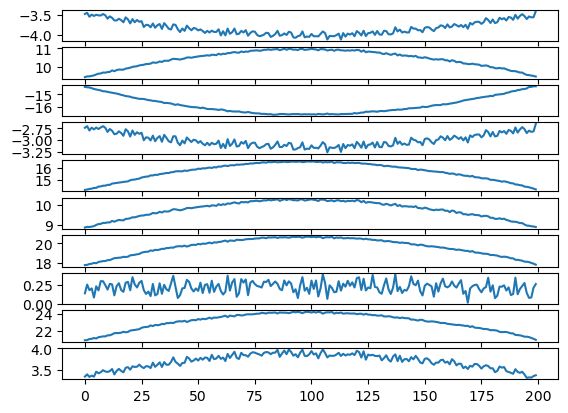

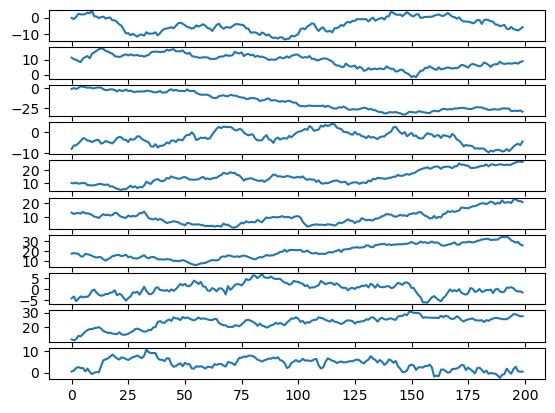

In [21]:
for i in range(neuron_num):
    plt.subplot(10, 1, i+1)
    plt.plot(predictions[1][i])
plt.show()

for i in range(neuron_num):
    plt.subplot(10, 1, i+1)
    plt.plot(ground_truths[1][i])
plt.show()